#**Data Visualization IS 445 Final project**
*Instructor: Matthew Turk*

*Notebook by Group H* : Beatrice Lovely, Zane Inman, Manasi Karale, Zahra Malwi, Suhani Jaiswal

This data was gathered by Beatrice and a friend on the streets and sidewalks of Champaign


# ***Sidewalk vs Street***

Classifying where an electric scooter is ridden based on data from Accelerometer and Gyroscope measurements


- Electric scooters are becoming ubiqitous in major cities (Lime, Spin, Voi etc)
- These scooters are only supposed to be ridden on streets or bikelanes - can we, with the help of a machine learning model, classify whether a person is riding on the sidewalk (illegal) vs street (legal)?
- An electric scooter was ridden on streets and sidewalks around Champaign
- A smartphone attached to the scooter measured Accelerometer, Gyroscope, Magnetometer


**Data Collection Setup - smartphone mounted on scooter**
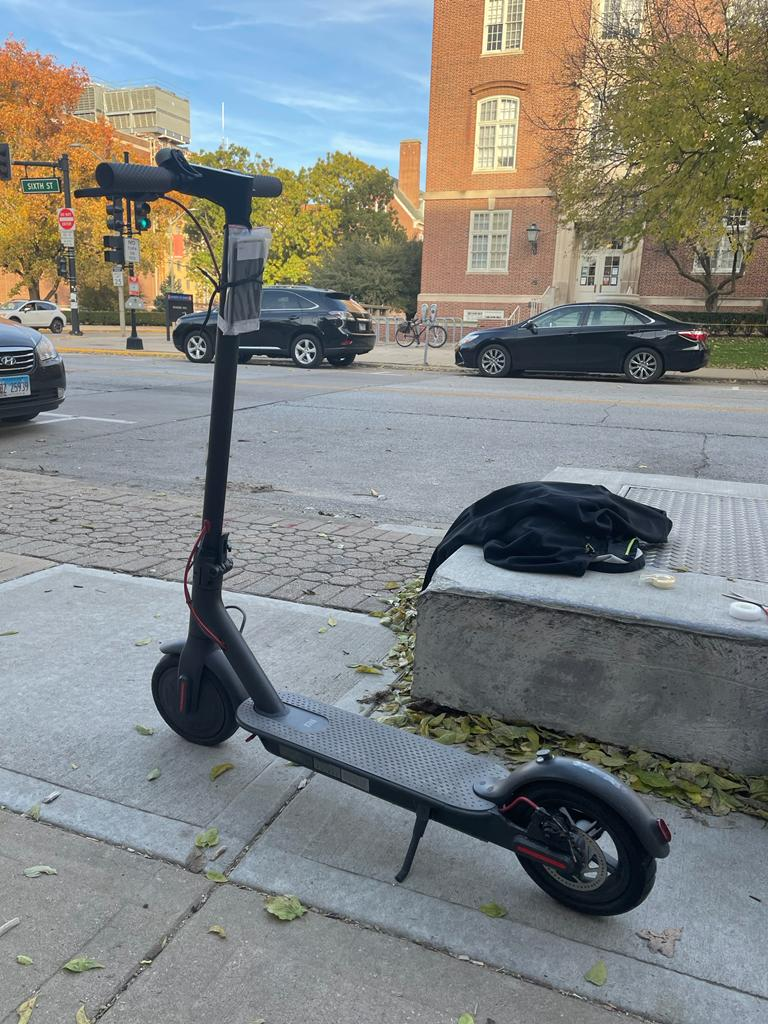



**Sidewalk on Gregory and Sixth Street**

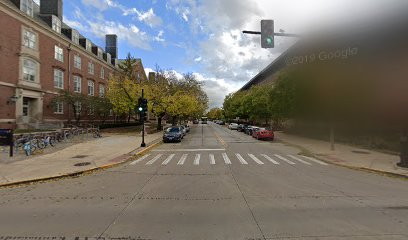



**Street 2 : Loredo Taft Drive**

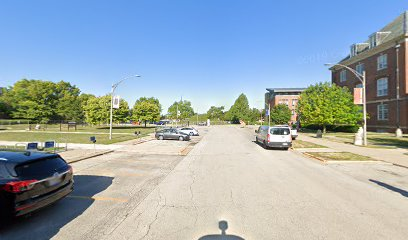

**Parameters used:**

1. **Accelerometer**; It measures linear acceleration (specified in mV/g) along one or several axis.
2. **Gyroscope**; A gyroscope measures angular velocity (specified in mV/deg/s)
3. **Magnetometer**; A magnetometer is a device that measures magnetic field or magnetic dipole moment. Magnetometers are widely used for measuring the Earth's magnetic field, in geophysical surveys, to detect magnetic anomalies of various types, and to determine the dipole moment of magnetic materials.

##***The End Goal***


Can a machine learning model classify where the scooter was ridden based on the data, and what features would it need to do so?

If we can visualize features in the data and qualitatively see a difference - then a ML model should be able to tell the difference as well!


# **Our Vizualization Plan:**
1. To make visualization powerful enough so that even before the data is fed to the ML model we are able to distinguish between street and sidewalk.
2. Speed of the rider and the weight carried shouldn't influence the data and hence we aggregated each sensor and each direction by using mean as its central tendency.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#% cd gdrive/MyDrive/
% cd "Data Viz project"
!ls

In [ ]:
%cd data-viz-project/
!ls

In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal



In [ ]:
#file names:
files = glob.glob("*.csv")
#for filename in files: print(filename)

In [ ]:
col_names=['time',
           'accl_id', 'accl_x', 'accl_y', 'accl_z',
           'gyro_id', 'gyro_x', 'gyro_y', 'gyro_z',
           'mag_id', 'mag_x', 'mag_y', 'mag_z']

a = pd.read_csv(filepath_or_buffer='sidewalk1MedRider1Weight.csv', names=col_names)
b = pd.read_csv(filepath_or_buffer='st2MedRider1.csv', names=col_names)
#c = pd.read_csv(filepath_or_buffer='street1MedBweight1.csv', names=col_names)

In [ ]:
#time stamps:
time_diff = []
for i in range(1, len(a)):
  time_diff.append(a.loc[i, ['time']] - a.loc[i-1, ['time']])
print(time_diff[:100])
mean_time = np.mean(time_diff)
print(mean_time)
Hz = 1/0.0198
print(Hz)

Conclusion: sampling frequency is 50 Hz

In [ ]:
def visualize_imu(df, title):
    frequency = 50
    '''plots raw accelerometer of one data sample in 3 axes'''
    N = 1000 #num samples to plot
    imu_x1 = df.loc[:N,['accl_x']]
    imu_y1 = df.loc[:N,['accl_y']]
    imu_z1 = df.loc[:N,['accl_z']]
    x_axis = np.linspace(0, N/frequency, num=N+1)
    print(x_axis.size)
    fig, ax = plt.subplots(3, 1, sharex='all', figsize=(10,10))
    fig.add_subplot(111, frameon=False)
    plt.ylabel("acceleration (m/s**2)", labelpad=20, fontweight='bold')
    plt.xlabel("time (s)", fontweight='bold')
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    ax[0].plot(imu_x1, color='red', marker='o', label='raw x')
    ax[0].plot(a.loc[:N, ['filtered_x']], color='yellow', marker='x', label='filtered x')
    ax[0].legend()
    #ax[0].set_xticks(x_axis)
    ax[0].set_title("x axis", fontsize=15)
    ax[0].set_ylim([-5, 5])

    
    ax[1].plot(x_axis, a.loc[:N, ['norm_time']], imu_y1, color='blue', marker='o', label='raw y')
    ax[1].plot(x_axis, a.loc[:N, ['norm_time']], a.loc[:N, ['filtered_y']], color='yellow', marker='x', label='filtered y')
    ax[1].legend()
    ax[1].set_title("y axis", fontsize=15)
    ax[1].set_ylim([4, 15])
    #ax[1].set_xticks(x_axis)

    ax[2].plot(imu_z1, color='green', marker='o', label='raw z')
    ax[2].set_title("z axis", fontsize=15)
    ax[2].set_ylim([-7, 4])
    #ax[2].set_xticks(x_axis)
    fig.suptitle(title)
    plt.show() 
    #plt.savefig("plots/"+title+".png")
    plt.close()

##Beatrice Visualizations

In [ ]:
visualize_imu(df=a, title='Rider 1 on Sidewalk')

1001


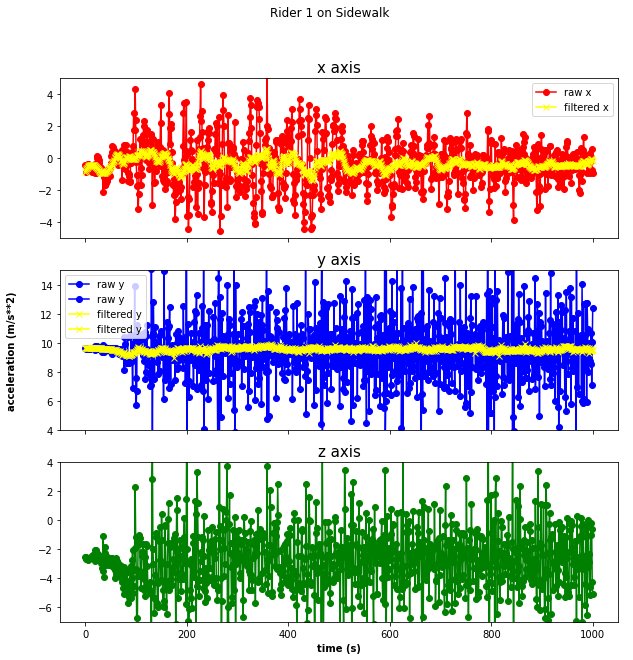

In [ ]:
#apply filter
#print(a.head())
yhat = scipy.signal.savgol_filter(a['accl_y'].to_numpy(), window_length=51, polyorder=3)
#a.insert(2, 'filtered_y', yhat)
xhat = scipy.signal.savgol_filter(a['accl_x'].to_numpy(), window_length=51, polyorder=3)
a['filtered_x'] = xhat
time_norm = a['time']-a.loc[0, ['time']]
#a.insert(1, 'norm_time', time_norm)
#print(a.loc[:100, ['filtered_x']])
visualize_imu(df=a, title='Rider 1 on Sidewalk')



In [ ]:
def sliding_features(df, window_size):
  #print(window_size)
  #print(df.loc[25:25-25['accl_x'])
  df['mean_accl_x'] = 0
  df['mean_accl_y'] = 0
  for i in range(0, window_size, len(df)-window_size):
    df.loc[i, ['mean_accl_x']] = np.nanmean(df.loc[i:i+window_size, ['accl_x']])
    df.loc[i, ['mean_accl_y']] = np.nanmean(df.loc[i:i+window_size, ['accl_y']])
    df.loc[i, ['mean_accl_z']] = np.nanmean(df.loc[i:i+window_size, ['accl_z']])
    df.loc[i, ['std_accl_x']] = np.nanstd(df.loc[i:i+window_size, ['accl_x']])
    df.loc[i, ['std_accl_y']] = np.nanstd(df.loc[i:i+window_size, ['accl_y']])
    df.loc[i, ['std_accl_z']] = np.nanstd(df.loc[i:i+window_size, ['accl_z']])
    df.loc[i, ['mean_gyro_x']] = np.nanmean(df.loc[i:i+window_size, ['gyro_x']])
    df.loc[i, ['mean_gyro_y']] = np.nanmean(df.loc[i:i+window_size, ['gyro_y']])
    df.loc[i, ['mean_gyro_z']] = np.nanmean(df.loc[i:i+window_size, ['gyro_z']])
    df.loc[i, ['std_gyro_x']] = np.nanstd(df.loc[i:i+window_size, ['gyro_x']])
    df.loc[i, ['std_gyro_y']] = np.nanstd(df.loc[i:i+window_size, ['gyro_y']])
    df.loc[i, ['std_gyro_z']] = np.nanstd(df.loc[i:i+window_size, ['gyro_z']])
    #df.loc[i, ['std_gyro_x']]
    
sliding_features(a, window_size=25)
#for i in range(100):
#  print(a.loc[i, ['std_accl_x']])

In [ ]:
plt.plot(a.loc[:500, ['mean_accl_x']])
plt.title("sliding window mean of x axis acceleration, sidewalk rider")

In [ ]:
sliding_features(b, window_size=25)
plt.plot(b.loc[:500, ['mean_accl_x']])
plt.title("sliding window mean street rider")

In [ ]:
plt.plot(a.loc[:500, ['std_accl_x']])
plt.title("sliding window std of x axis acceleration sidewalk rider")

In [ ]:
plt.plot(b.loc[:500, ['std_accl_x']])
plt.title('sliding window std of x axis acceleration street rider')

In [ ]:
COL_NAMES =['time',
           'accl_id', 'accl_x', 'accl_y', 'accl_z',
           'gyro_id', 'gyro_x', 'gyro_y', 'gyro_z',
           'mag_id', 'mag_x', 'mag_y', 'mag_z']

def normalize(df, mean, std):
    """
    z normalization (mean 0, std 1)
    """
    normalized_df = (df - mean) / std
    return normalized_df

def read_imu_stream_file(filepath):
    df = pd.read_csv(filepath_or_buffer=filepath, names=COL_NAMES)
    full_data_stream = df[['accl_x', 'accl_y', 'accl_z', 'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z']]
    # gyro_df = df[['gyro_x', 'gyro_y', 'gyro_z']]
    # mag_df = df[['mag_x', 'mag_y', 'mag_z']]
    full_data_stream = full_data_stream[150:-150]
    return full_data_stream, full_data_stream.shape[0]

def samples_and_feature_extraction(dataframe, window_size = 150, filter=None):
    '''divides into training points of size window_size (default 150 samples = 3 seconds)
        computes features (mean, std, percentiles)
        returns dataframe of dim (num_samples,num_features (24))'''
    col_names = ['mean_accl_x', 'mean_accl_y', 'mean_accl_z', 'mean_gyro_x', 'mean_gyro_y', 
    'mean_gyro_z', 'mean_mag_x', 'mean_mag_y', 'mean_mag_z', 'std_accl_x', 'std_accl_y', 'std_accl_z', 'std_gyro_x', 'std_gyro_y', 'std_gyro_z', 'std_mag_x', 'std_mag_y', 'std_mag_z',
    '90th_accl_x', '90th_accl_y', '90th_accl_z', '90th_gyro_x', '90th_gyro_y', '90th_gyro_z', '90th_mag_x', '90th_mag_y', '90th_mag_z',
    '10th_accl_x', '10th_accl_y', '10th_accl_z', '10th_gyro_x', '10th_gyro_y', '10th_gyro_z', '10th_mag_x', '10th_mag_y', '10th_mag_z']

    #print(len(col_names))
    #print(dataframe.head())
    idx = dataframe.shape[0] - (dataframe.shape[0] % window_size)
    dataframe = dataframe[:idx]
    num_samples = dataframe.shape[0]/window_size
    #print(num_samples)
    splits = np.array(np.vsplit(dataframe, num_samples))
    mean = np.nanmean(splits, axis=1)
    std = np.nanstd(splits, axis=1)
    percentile_90th = np.nanpercentile(splits, q=90, axis=1)
    percentile_10th = np.nanpercentile(splits, q=10, axis=1)
    
    samples = np.hstack((mean, std, percentile_90th, percentile_10th))
   # print(samples.shape)
    all_samples = pd.DataFrame(samples, columns=col_names)
    if filter == 'savgol':
        num_peaks = np.zeros((len(splits)))
        for i, split in enumerate(splits):
            filtered = savgol_filter(split, window_length=5, polyorder=3, axis=1)
            peaks = find_peaks(filtered)
            num_peaks[i] = len(peaks)
        all_samples['num_peaks'] = num_peaks
    return all_samples

def read_all_stream_files_in_dir(filenames, window_size=150):
    """
    reads all data streams as csv, normalize, divide into training samples and label
    prints data stats and returns dataframe of all training samples
    """
    #filenames = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]  # get all stream filenames

    #col_names = list()
    #for i in range(window_size):
    #    col_names.extend([f'accl_x_{i}', f'accl_y_{i}', f'accl_z_{i}'])

    # Different types of streets and sidewalks (for secondary labels)
    df_sidewalk1 = pd.DataFrame()
    df_sidewalk = pd.DataFrame()
    df_street1 = pd.DataFrame()
    df_street2 = pd.DataFrame()
    df_street3 = pd.DataFrame()

    for filename in filenames:
        data_stream, num_rows = read_imu_stream_file(filepath=filename)

        # append to corresponding df
        if 'sidewalk1' in filename:
            if df_sidewalk1.empty:
                df_sidewalk1 = data_stream
            else: 
                df_sidewalk1 = df_sidewalk1.append(data_stream, ignore_index=True)
        elif 'sidewalk' in filename:
            if df_sidewalk.empty:
                df_sidewalk = data_stream
            else:
                df_sidewalk = df_sidewalk.append(data_stream, ignore_index=True)
        elif 'street1' in filename or 'st1' in filename:
            if df_street1.empty:
                df_street1 = data_stream
            else:
                df_street1 = df_street1.append(data_stream, ignore_index=True)
        elif 'street2' in filename or 'st2' in filename:
            if df_street2.empty:
                df_street2 = data_stream
            else:
                df_street2 = df_street2.append(data_stream, ignore_index=True)
        elif 'street3' in filename or 'st3' in filename:
            if df_street3.empty:
                df_street3 = data_stream
            else:
                df_street3 = df_street3.append(data_stream, ignore_index=True)

    # normalize all dfs
    full_df = pd.concat((df_sidewalk1, df_sidewalk, df_street1, df_street2, df_street3), axis=0, ignore_index=True)
    mean = full_df.mean(skipna=True)
    std = full_df.std(skipna=True)
    normalized_sidewalk1 = normalize(df_sidewalk1, mean, std)
    normalized_sidewalk = normalize(df_sidewalk, mean, std)
    normalized_street1 = normalize(df_street1, mean, std)
    normalized_street2 = normalize(df_street2, mean, std)
    normalized_street3 = normalize(df_street3, mean, std)

    #print("good so far")

    # extract features
    sidewalk1_samples = samples_and_feature_extraction(normalized_sidewalk1, window_size=window_size)
    sidewalk_samples = samples_and_feature_extraction(normalized_sidewalk, window_size=window_size)
    street1_samples = samples_and_feature_extraction(normalized_street1, window_size=window_size)
    street2_samples = samples_and_feature_extraction(normalized_street2, window_size=window_size)
    street3_samples = samples_and_feature_extraction(normalized_street3, window_size=window_size)

    # add secondary labels
    sidewalk1_samples['sublabel'] = 0
    sidewalk_samples['sublabel'] = 1
    street1_samples['sublabel'] = 2
    street2_samples['sublabel'] = 3
    street3_samples['sublabel'] = 4

    ''''sidewalk1' = 0
   'sidewalk' = 1
    'street1' = 2
    'street2' = 3
    'street3 = 4 '''

    # combine different sidewalk and street dfs respectively
    all_sidewalk_samples = pd.concat((sidewalk1_samples, sidewalk_samples), axis=0, ignore_index=True)
    all_street_samples = pd.concat((street1_samples, street2_samples, street3_samples), axis=0, ignore_index=True)

    # add primary labels and combine
    all_sidewalk_samples['label'] = 0
    all_street_samples['label'] = 1
    all_samples = pd.concat((all_sidewalk_samples, all_street_samples), axis=0, ignore_index=True)

    #print(all_samples.size)

    return all_samples

In [ ]:
all_samples = read_all_stream_files_in_dir(filenames=files)
#all_samples.head()

In [ ]:
import seaborn as sns

def feature_analysis():
    samples = read_all_stream_files_in_dir(filenames = files)
    corr= samples.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    plt.figure(figsize=(50,50))
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    
    
    plt.show()
    print("done!")


Above I have actually divided data into training samples for a ML model by "chopping up" each and every data stream into windows of 75 samples each, and z-normalizing (mean 0,  std 1), and computing features (mean, std, 90th percentile, 10th percentile. Below is a basic feature importance analysis, a heatmap of which features are most correlated to the label. Interestingly it is the 10th percentile of of accelerometer in y and z directions, I was expecting it to be standard deviation or something.


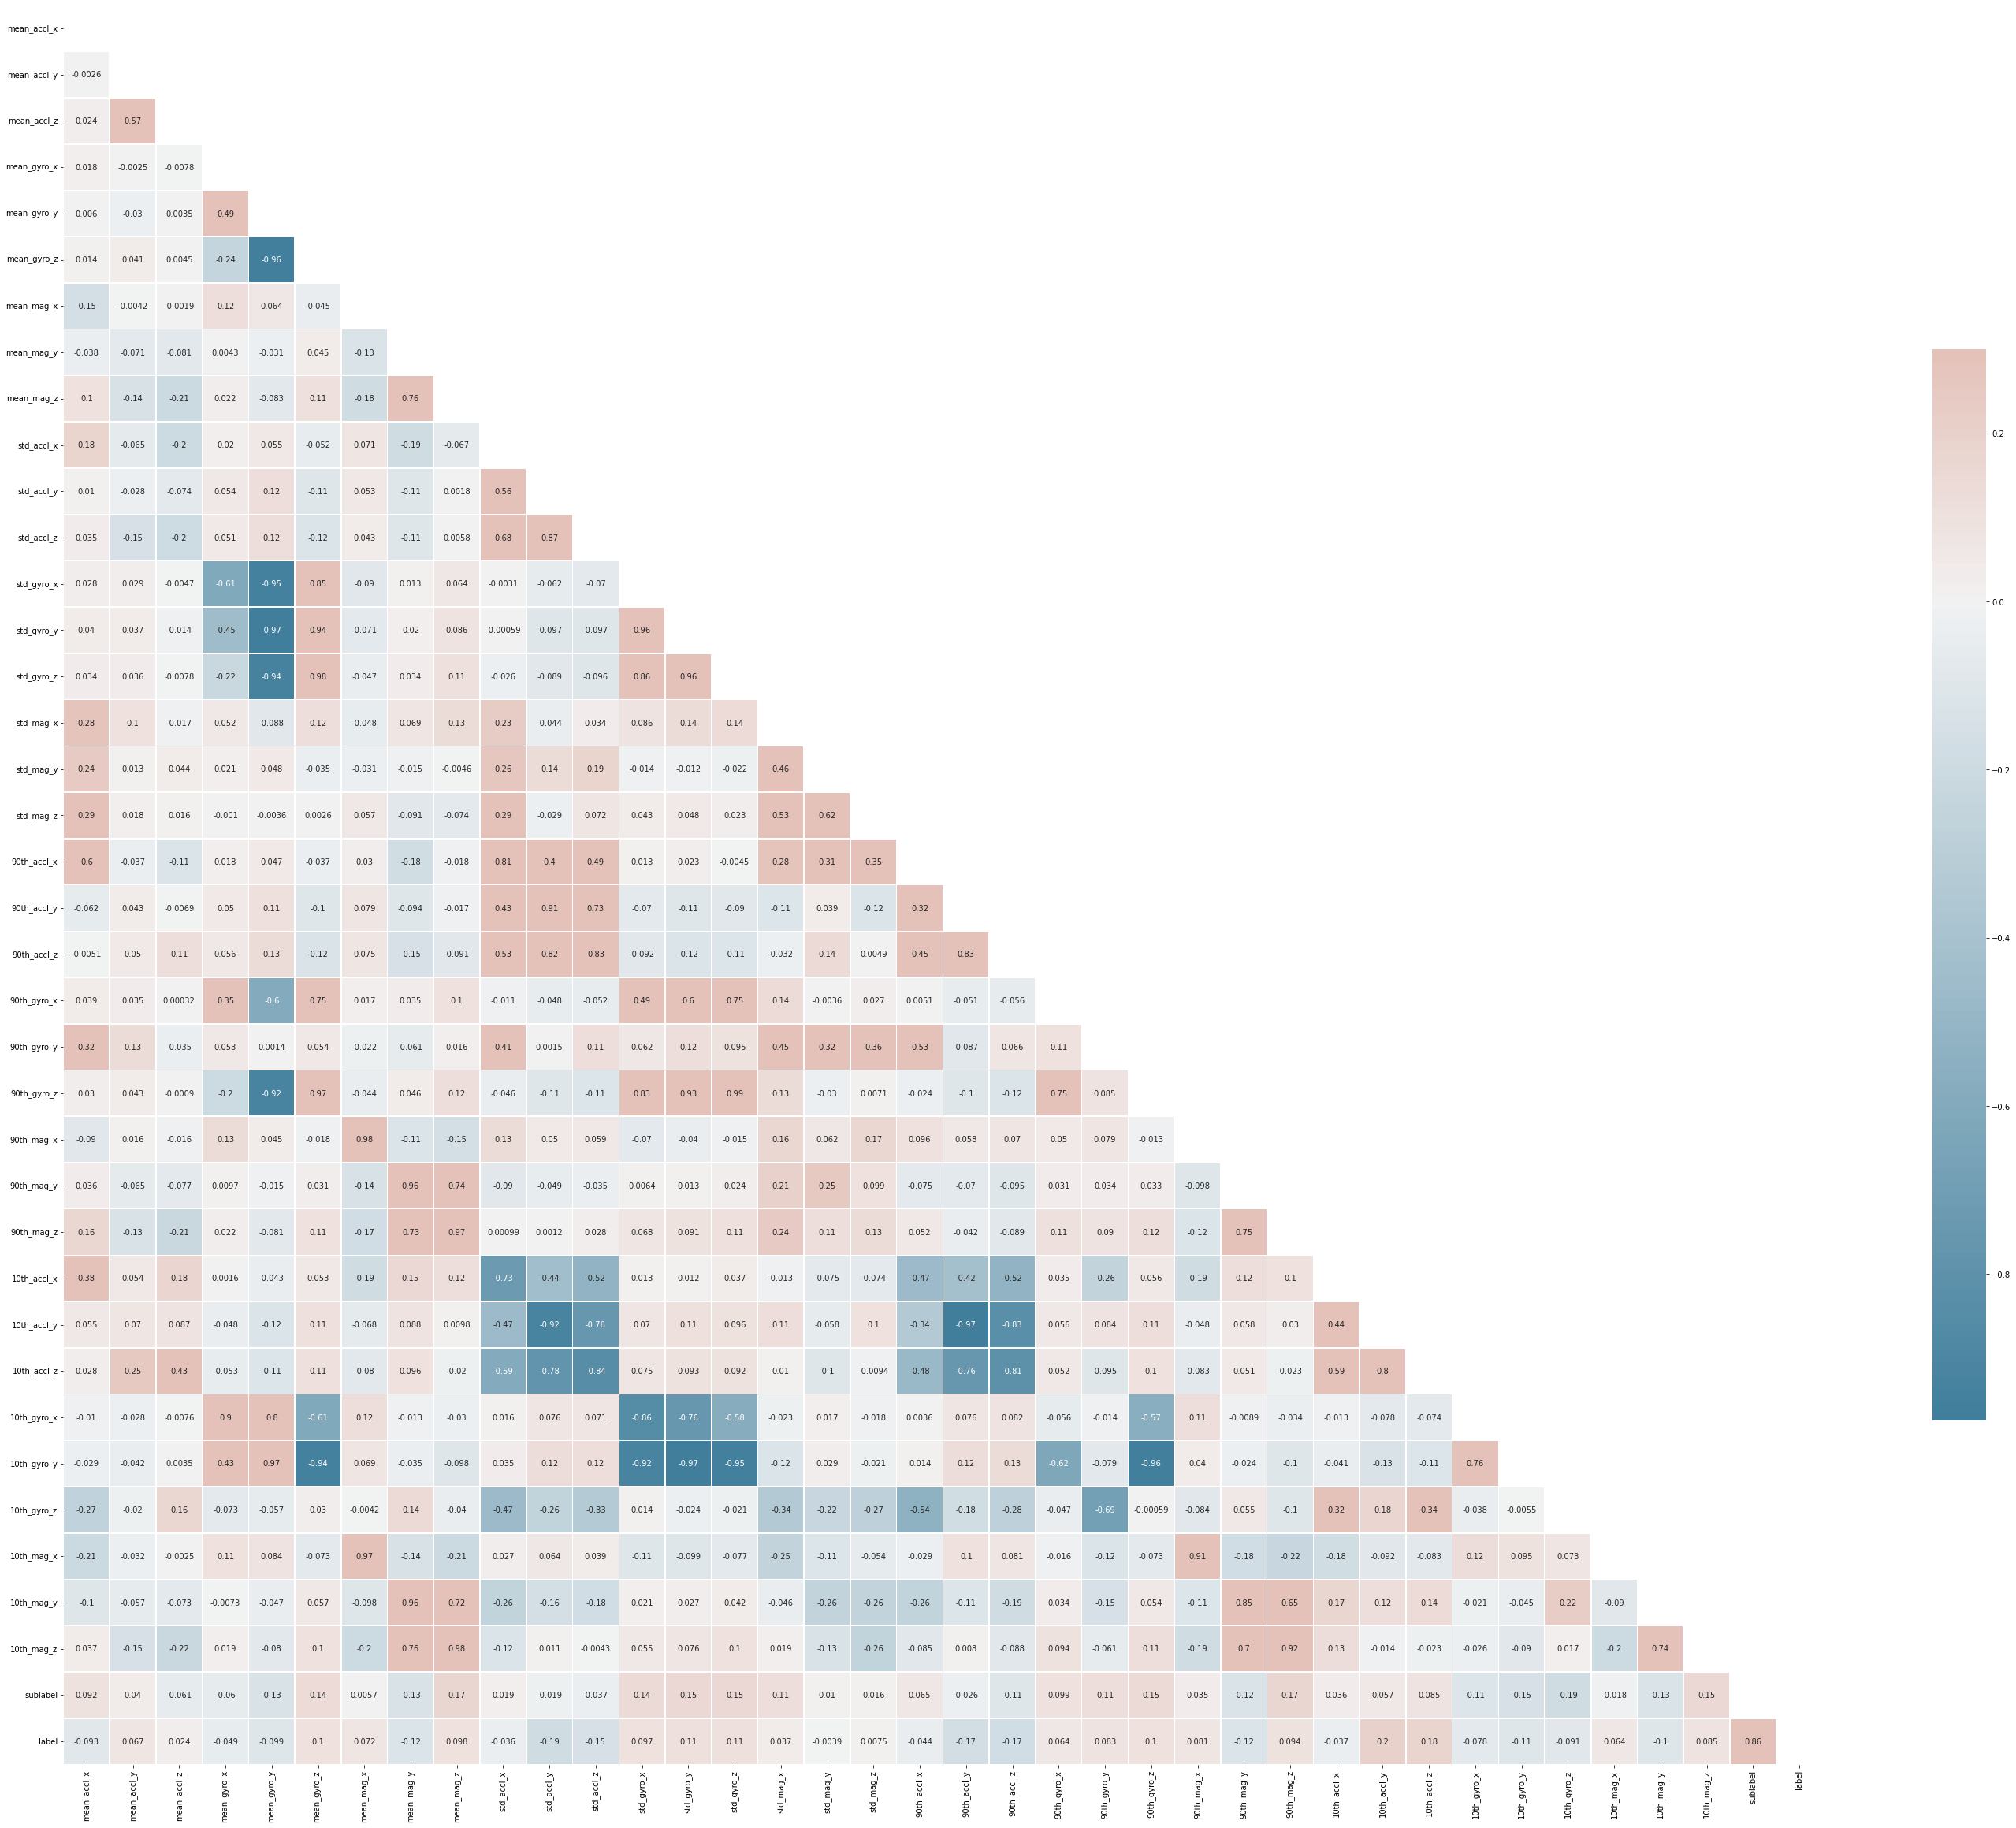

done!


In [ ]:
feature_analysis()


In [ ]:
from ipywidgets import interact
import ipywidgets
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
files = glob.glob("*.csv")

#all_samples = read_all_stream_files_in_dir(filenames=files)
@ipywidgets.interact(x_axis=all_samples.columns, y_axis=all_samples.columns, color_points_by=['label', 'sublabel'])

def plot_features(x_axis, y_axis, color_points_by):
  url = 'https://raw.githubusercontent.com/grouphdataviz8/grouphdataviz8.github.io/main/'
  colors_label = {0: "sidewalk", 1: 'street'}
  colors_sublabel = {0: "sidewalk", 1: "brick sidewalk", 2: "gregory drive", 3: "Lorado Taft Dr", 4: "6th st"}
  all_samples = pd.read_csv(url+"all_samples.csv")
  #if color_points_by == 'label':
    #plt.legend([0, 1], ['sidewalk', 'street'])
  #plt.scatter(x=x_axis, y=y_axis, c=color_points_by)
  all_samples.plot.scatter(x=x_axis, y=y_axis, c=color_points_by, colormap='viridis', colorbar=None)
  #if color_points_by == 'label':

interactive(children=(Dropdown(description='x_axis', options=('mean_accl_x', 'mean_accl_y', 'mean_accl_z', 'me…

##**Visualizations by Manasi Karale:**

**Overview:**

The above plot is divided into 3*3 subplots. They have common X and Y axis. These subplots can be grouped such that vertically they represent same direction of sensor and horizontally they represnt sensor. The X axis has 6 main ticks - 
  1. fast speed + no weight rider
  2. fast speed + weight rider
  3. medium speed + no weight rider
  4. medium speed + weight rider
  5. slow speed + no weight rider
  6. slow speed + weight rider

The Y axis is the mean values that we calculated for above 6 combinations. The blue line represents sidewalk values and orange line represents street values. 

In [ ]:
# Import required libraries

In [ ]:
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# TODO: add the method to reduce the lines of code

In [ ]:
# define the column names required for the visualizations

In [ ]:
col_names=['time',
           'accl_id', 'accl_x', 'accl_y', 'accl_z',
           'gyro_id', 'gyro_x', 'gyro_y', 'gyro_z',
           'mag_id', 'mag_x', 'mag_y', 'mag_z']

In [ ]:
# read the csv files. Below are the abbrevation details:
# sw = SideWalk
# f = fast 
# m = medium
# s = slow
# n = no weight
# w = weight
url = 'https://raw.githubusercontent.com/grouphdataviz8/grouphdataviz8.github.io/main/'
swfn = pd.read_csv(url+'sidewalk1FastRider1NoWeight.csv', names=col_names)
swfw = pd.read_csv(url+'sidewalk1FastRider1Weight.csv', names=col_names)
swmn = pd.read_csv(url+'sidewalk1MedRider1Noweight.csv', names=col_names)
swmw = pd.read_csv(url+'sidewalk1MedRider1Weight.csv', names=col_names)
swsn = pd.read_csv(url+'sidewalk1SlowRider1NoWeight.csv', names=col_names)
swsw = pd.read_csv(url+'sidewalk1SlowRider1Weight.csv', names=col_names)

stfn = pd.read_csv(url+'st1FastRider1NoWeight1.csv', names=col_names)
stfw = pd.read_csv(url+'st1Fastrider1Weight1.csv', names=col_names)
stmn = pd.read_csv(url+'st1MedRider1NoWeight1.csv', names=col_names)
stmw = pd.read_csv(url+'st1MedRider1Weight1.csv', names=col_names)
stsn = pd.read_csv(url+'st1SlowRider1Noweight1.csv', names=col_names)
stsw = pd.read_csv(url+'st1SlowRider1Weight1.csv', names=col_names)

In [ ]:
# for each sensor and each direction - calculate the mean for every sidewalk file and street file

In [ ]:
sw_acc_x_mean = [swfn['accl_x'].mean(), swfw['accl_x'].mean(), swmn['accl_x'].mean(),
                swmw['accl_x'].mean(), swsn['accl_x'].mean(), swsw['accl_x'].mean()]
st_acc_x_mean = [stfn['accl_x'].mean(), stfw['accl_x'].mean(), stmn['accl_x'].mean(),
                stmw['accl_x'].mean(), stsn['accl_x'].mean(), stsw['accl_x'].mean()]
sw_acc_y_mean = [swfn['accl_y'].mean(), swfw['accl_y'].mean(), swmn['accl_y'].mean(),
                swmw['accl_y'].mean(), swsn['accl_y'].mean(), swsw['accl_y'].mean()]
st_acc_y_mean = [stfn['accl_y'].mean(), stfw['accl_y'].mean(), stmn['accl_y'].mean(),
                stmw['accl_y'].mean(), stsn['accl_y'].mean(), stsw['accl_y'].mean()]
sw_acc_z_mean = [swfn['accl_z'].mean(), swfw['accl_z'].mean(), swmn['accl_z'].mean(),
                swmw['accl_z'].mean(), swsn['accl_z'].mean(), swsw['accl_z'].mean()]
st_acc_z_mean = [stfn['accl_z'].mean(), stfw['accl_z'].mean(), stmn['accl_z'].mean(),
                stmw['accl_z'].mean(), stsn['accl_z'].mean(), stsw['accl_z'].mean()]

In [ ]:
sw_gyro_x_mean = [swfn['gyro_x'].mean(), swfw['gyro_x'].mean(), swmn['gyro_x'].mean(),
                swmw['gyro_x'].mean(), swsn['gyro_x'].mean(), swsw['gyro_x'].mean()]
st_gyro_x_mean = [stfn['gyro_x'].mean(), stfw['gyro_x'].mean(), stmn['gyro_x'].mean(),
                stmw['gyro_x'].mean(), stsn['gyro_x'].mean(), stsw['gyro_x'].mean()]
sw_gyro_y_mean = [swfn['gyro_y'].mean(), swfw['gyro_y'].mean(), swmn['gyro_y'].mean(),
                swmw['gyro_y'].mean(), swsn['gyro_y'].mean(), swsw['gyro_y'].mean()]
st_gyro_y_mean = [stfn['gyro_y'].mean(), stfw['gyro_y'].mean(), stmn['gyro_y'].mean(),
                stmw['gyro_y'].mean(), stsn['gyro_y'].mean(), stsw['gyro_y'].mean()]
sw_gyro_z_mean = [swfn['gyro_z'].mean(), swfw['gyro_z'].mean(), swmn['gyro_z'].mean(),
                swmw['gyro_z'].mean(), swsn['gyro_z'].mean(), swsw['gyro_z'].mean()]
st_gyro_z_mean = [stfn['gyro_z'].mean(), stfw['gyro_z'].mean(), stmn['gyro_z'].mean(),
                stmw['gyro_z'].mean(), stsn['gyro_z'].mean(), stsw['gyro_z'].mean()]

In [ ]:
sw_mag_x_mean = [swfn['mag_x'].mean(), swfw['mag_x'].mean(), swmn['mag_x'].mean(),
                swmw['mag_x'].mean(), swsn['mag_x'].mean(), swsw['mag_x'].mean()]
st_mag_x_mean = [stfn['mag_x'].mean(), stfw['mag_x'].mean(), stmn['mag_x'].mean(),
                stmw['mag_x'].mean(), stsn['mag_x'].mean(), stsw['mag_x'].mean()]
sw_mag_y_mean = [swfn['mag_y'].mean(), swfw['mag_y'].mean(), swmn['mag_y'].mean(),
                swmw['mag_y'].mean(), swsn['mag_y'].mean(), swsw['mag_y'].mean()]
st_mag_y_mean = [stfn['mag_y'].mean(), stfw['mag_y'].mean(), stmn['mag_y'].mean(),
                stmw['mag_y'].mean(), stsn['mag_y'].mean(), stsw['mag_y'].mean()]
sw_mag_z_mean = [swfn['mag_z'].mean(), swfw['mag_z'].mean(), swmn['mag_z'].mean(),
                swmw['mag_z'].mean(), swsn['mag_z'].mean(), swsw['mag_z'].mean()]
st_mag_z_mean = [stfn['mag_z'].mean(), stfw['mag_z'].mean(), stmn['mag_z'].mean(),
                stmw['mag_z'].mean(), stsn['mag_z'].mean(), stsw['mag_z'].mean()]

In [ ]:
# plot the above values 

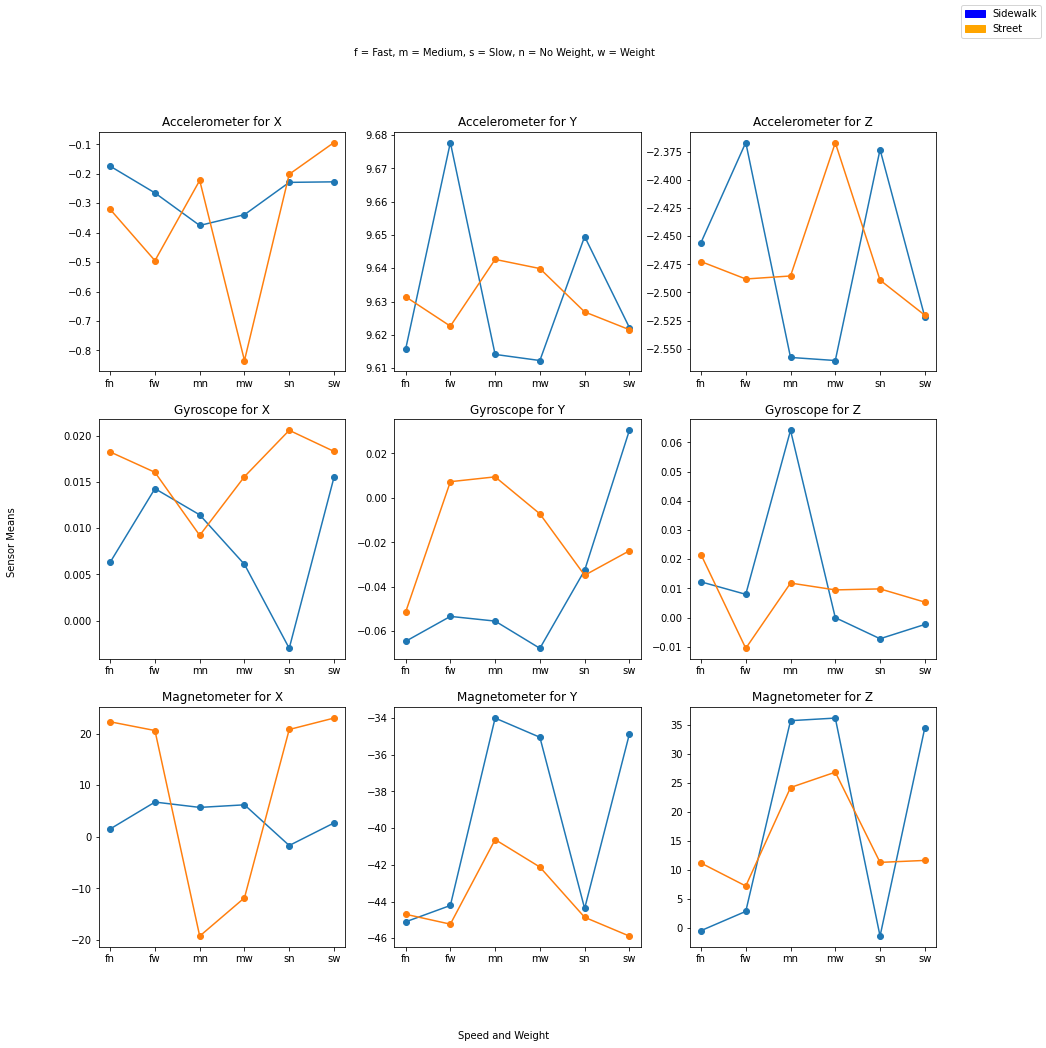

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3,figsize=(15,15))

ax1.plot(sw_acc_x_mean, label='Sidewalk',  marker="o")
ax1.plot(st_acc_x_mean, label='Street',  marker="o")
ax1.xaxis.set_ticks([0,1,2,3,4,5])
ax1.xaxis.set_ticklabels(['fn', 'fw', 'mn', 'mw', 'sn', 'sw'])
ax1.title.set_text('Accelerometer for X')

ax2.plot(sw_acc_y_mean, label='Sidewalk',  marker="o")
ax2.plot(st_acc_y_mean, label='Street',  marker="o")
ax2.xaxis.set_ticks([0,1,2,3,4,5])
ax2.xaxis.set_ticklabels(['fn', 'fw', 'mn', 'mw', 'sn', 'sw'])
ax2.title.set_text('Accelerometer for Y')

ax3.plot(sw_acc_z_mean, label='Sidewalk',  marker="o")
ax3.plot(st_acc_z_mean, label='Street',  marker="o")
ax3.xaxis.set_ticks([0,1,2,3,4,5])
ax3.xaxis.set_ticklabels(['fn', 'fw', 'mn', 'mw', 'sn', 'sw'])
ax3.title.set_text('Accelerometer for Z')

ax4.plot(sw_gyro_x_mean, label='Sidewalk',  marker="o")
ax4.plot(st_gyro_x_mean, label='Street',  marker="o")
ax4.xaxis.set_ticks([0,1,2,3,4,5])
ax4.xaxis.set_ticklabels(['fn', 'fw', 'mn', 'mw', 'sn', 'sw'])
ax4.title.set_text('Gyroscope for X')

ax5.plot(sw_gyro_y_mean, label='Sidewalk',  marker="o")
ax5.plot(st_gyro_y_mean, label='Street',  marker="o")
ax5.xaxis.set_ticks([0,1,2,3,4,5])
ax5.xaxis.set_ticklabels(['fn', 'fw', 'mn', 'mw', 'sn', 'sw'])
ax5.title.set_text('Gyroscope for Y')

ax6.plot(sw_gyro_z_mean, label='Sidewalk',  marker="o")
ax6.plot(st_gyro_z_mean, label='Street',  marker="o")
ax6.xaxis.set_ticks([0,1,2,3,4,5])
ax6.xaxis.set_ticklabels(['fn', 'fw', 'mn', 'mw', 'sn', 'sw'])
ax6.title.set_text('Gyroscope for Z')

ax7.plot(sw_mag_x_mean, label='Sidewalk',  marker="o")
ax7.plot(st_mag_x_mean, label='Street',  marker="o")
ax7.xaxis.set_ticks([0,1,2,3,4,5])
ax7.xaxis.set_ticklabels(['fn', 'fw', 'mn', 'mw', 'sn', 'sw'])
ax7.title.set_text('Magnetometer for X')

ax8.plot(sw_mag_y_mean, label='Sidewalk',  marker="o")
ax8.plot(st_mag_y_mean, label='Street',  marker="o")
ax8.xaxis.set_ticks([0,1,2,3,4,5])
ax8.xaxis.set_ticklabels(['fn', 'fw', 'mn', 'mw', 'sn', 'sw'])
ax8.title.set_text('Magnetometer for Y')

ax9.plot(sw_mag_z_mean, label='Sidewalk',  marker="o")
ax9.plot(st_mag_z_mean, label='Street',  marker="o")
ax9.xaxis.set_ticks([0,1,2,3,4,5])
ax9.xaxis.set_ticklabels(['fn', 'fw', 'mn', 'mw', 'sn', 'sw'])
ax9.title.set_text('Magnetometer for Z')


blue_patch = mpatches.Patch(color='blue', label='Sidewalk')
orange_patch = mpatches.Patch(color='orange', label='Street')

fig.legend(handles=[blue_patch, orange_patch])

fig.text(0.5, 0.04, 'Speed and Weight', ha='center')
fig.text(0.04, 0.5, 'Sensor Means', va='center', rotation='vertical')
fig.text(0.5, 0.95, 'f = Fast, m = Medium, s = Slow, n = No Weight, w = Weight', ha='center')
plt.show()
fig.savefig('visualization.png')

**Inference:**

If the blue line never overlaps with orange line then we can use that direction and sensor to provide to the ML model that will use those values to differentiate between sidewalk and street.
To Note: Values not overlapping each other isn't the only requirement but we also need to have the blue line consistently over the orange line or vice a versa to confidently use the respective direction and sensor to plot the values.

---


**Overview:**

The above interactive visualization works on one file and direction axis within it at a time. It has a common X-axis (which can be chosen) and 2 Y-axis one on each side. The one on left is red colored and the one on right is green colored. It is a scatter plot that shows correlation between 3 values (in the form of 2 vs 2 scenario) at the same time. 

**Note:**

*1. For interactive widgets to work you can make use of jupyter notebook. All the data is dynamically accessed using realtime values, hence any changes made to the data files, will be directly reflected in the notebook. The notebook is then build into a webpage by saving widget state but not the interaction.*

*2. To access the live visualizations access this ipynb file - <a href='https://github.com/grouphdataviz8/grouphdataviz8.github.io/blob/main/index.html'> VIZ NOTEBOOK </a>*

In [ ]:
import ipywidgets
print('Steps to interact with thid visualization: ')
print('    1. Choose the Sensor for your plot''s X, Y and Z axis')
print('    2. Choose the Direction for your sensor')
print('    3. Choose the File you want to compare your sensors and directions in')
@ipywidgets.interact(sensor_x = ['accl', 'gyro', 'mag'], 
                     sensor_y = ['gyro', 'mag', 'accl'],
                     sensor_z = ['mag', 'accl', 'gyro'],
                     direction = ['x', 'y', 'z'], 
                     file_name = ['sidewalk1FastRider1NoWeight.csv','sidewalk1FastRider1Weight.csv','sidewalk1MedRider1Noweight.csv',
                                  'sidewalk1MedRider1Weight.csv','sidewalk1SlowRider1NoWeight.csv','sidewalk1SlowRider1Weight.csv',
                                  'sidewalkbrickRider2_1.csv','sidewalkbrickRider2_2.csv','sidewalkFastBWeight1.csv',
                                  'sidewalkFastRider2NoWeight1.csv','sidewalkFastRider2NoWeight2.csv','sidewalkMedRider2NoWeight1.csv',
                                  'sidewalkMedRider2Weight1.csv','sidewalkRider3.csv','sidewalkRider4.csv',
                                  'sidewalkRider5.csv','sidewalkSlowRider2NoWeight1.csv','sidewalkSlowRider2weighttest.csv',
                                  'st1FastRider1NoWeight1.csv','st1Fastrider1Weight1.csv','st1MedRider1NoWeight1.csv',
                                  'st1MedRider1Weight1.csv','st1SlowRider1Noweight1.csv','st1SlowRider1Weight1.csv',
                                  'st2Fastrider1.csv','st2FastRider2.csv','st2MedRider1.csv',
                                  'st2Rider2Med1.csv','st2Rider2Slow1.csv','st2Rider2Slow2.csv',
                                  'st2Rider4.csv','st2Rider5.csv','st2SlowRider1.csv',
                                  'st3Rider5.csv','street1FastRider2NoWeight1.csv','street1FastRider2Weight1.csv',
                                  'street1MedRider2NoWeight1.csv','street1MedRider2NoWeight2.csv','street1MedRider2weight1.csv',
                                  'street1Rider2NoWeight1.csv','street1SlowRider2NoWeight1.csv','street1SlowRider2Weight1.csv'])
def plot_sensor_data(sensor_x, sensor_y, sensor_z, direction, file_name):
  required_df = pd.read_csv(url + file_name, names=col_names)
  
  fig, ax1 = plt.subplots(figsize=(10,10))

  x = sensor_x + '_' + direction
  y = sensor_y + '_' + direction
  z = sensor_z + '_' + direction

  color = 'tab:red'
  ax1.set_xlabel(x) 
  ax1.set_ylabel(y, color = color) 
  ax1.scatter(required_df[x], required_df[y], color = color, marker="o") 
  ax1.tick_params(axis ='y', labelcolor = color)

  ax2 = ax1.twinx() 
    
  color = 'tab:green'
  ax2.set_ylabel(z, color = color) 
  ax2.scatter(required_df[x], required_df[z], color = color, marker="o") 
  ax2.tick_params(axis ='y', labelcolor = color) 
    
  plt.show()

Steps to interact with thid visualization: 
    1. Choose the Sensor for your plots X, Y and Z axis
    2. Choose the Direction for your sensor
    3. Choose the File you want to compare your sensors and directions in


interactive(children=(Dropdown(description='sensor_x', options=('accl', 'gyro', 'mag'), value='accl'), Dropdow…

**Inference:**

As seen above the Acclerometer vs Gyrometer (green dots) are distributed across the plot and away specifically from center. Whereas Acclerometer vs Magnetometer (red dots). In this way we can find out the relation between sensors for same file and directional axis and choose which one to use for our ML model to differentiate between Sidewalk and Street.

---

## Visualizations by Zahra Malwi

**Overview of the visualization**: This graph is a comparision between the Streets and the sidewalk in terms of their x_acceleration (i.e. when the movement is front and back) and time .Trying to see how many relevant breaks are their in the acceleartion of the scooter when moving on a sidewalk and on a street.

The breakes can tell about the difference as sidewalks are prone to have more blocks ( pedestrians / mailboxes/ dustbins/ stands,...) than the streets, as streets have more dedicated lanes mostly free of the above blocks;

**BUT it can be vice versa, too!**


In [ ]:
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
col_names=['time',
           'accl_id', 'accl_x', 'accl_y', 'accl_z',
           'gyro_id', 'gyro_x', 'gyro_y', 'gyro_z',
           'mag_id', 'mag_x', 'mag_y', 'mag_z']

In [ ]:
# read the csv files. Below are the abbrevation details:
# sw = SideWalk
# f = fast 
# m = medium
# s = slow
# n = no weight
# w = weight
url = 'https://raw.githubusercontent.com/grouphdataviz8/grouphdataviz8.github.io/main/'

swfn = pd.read_csv(url+'sidewalk1FastRider1NoWeight.csv', names=col_names)
swfw = pd.read_csv(url+'sidewalk1FastRider1Weight.csv', names=col_names)

stfn = pd.read_csv(url+'st1FastRider1NoWeight1.csv', names=col_names)
stfw = pd.read_csv(url+'st1Fastrider1Weight1.csv', names=col_names)



In [ ]:
stfn['time']  #To check min-max value of time

0       705074.14694
1       705074.16681
2       705074.18671
3       705074.20657
4       705074.22644
            ...     
1687    705107.66112
1688    705107.68098
1689    705107.70085
1690    705107.72072
1691    705107.74058
Name: time, Length: 1692, dtype: float64

In [ ]:
swfn['time']  #To check min-max value of time

0       701631.30463
1       701631.32450
2       701631.34437
3       701631.36423
4       701631.38410
            ...     
1242    701655.97934
1243    701655.99921
1244    701656.01908
1245    701656.03894
1246    701656.05881
Name: time, Length: 1247, dtype: float64

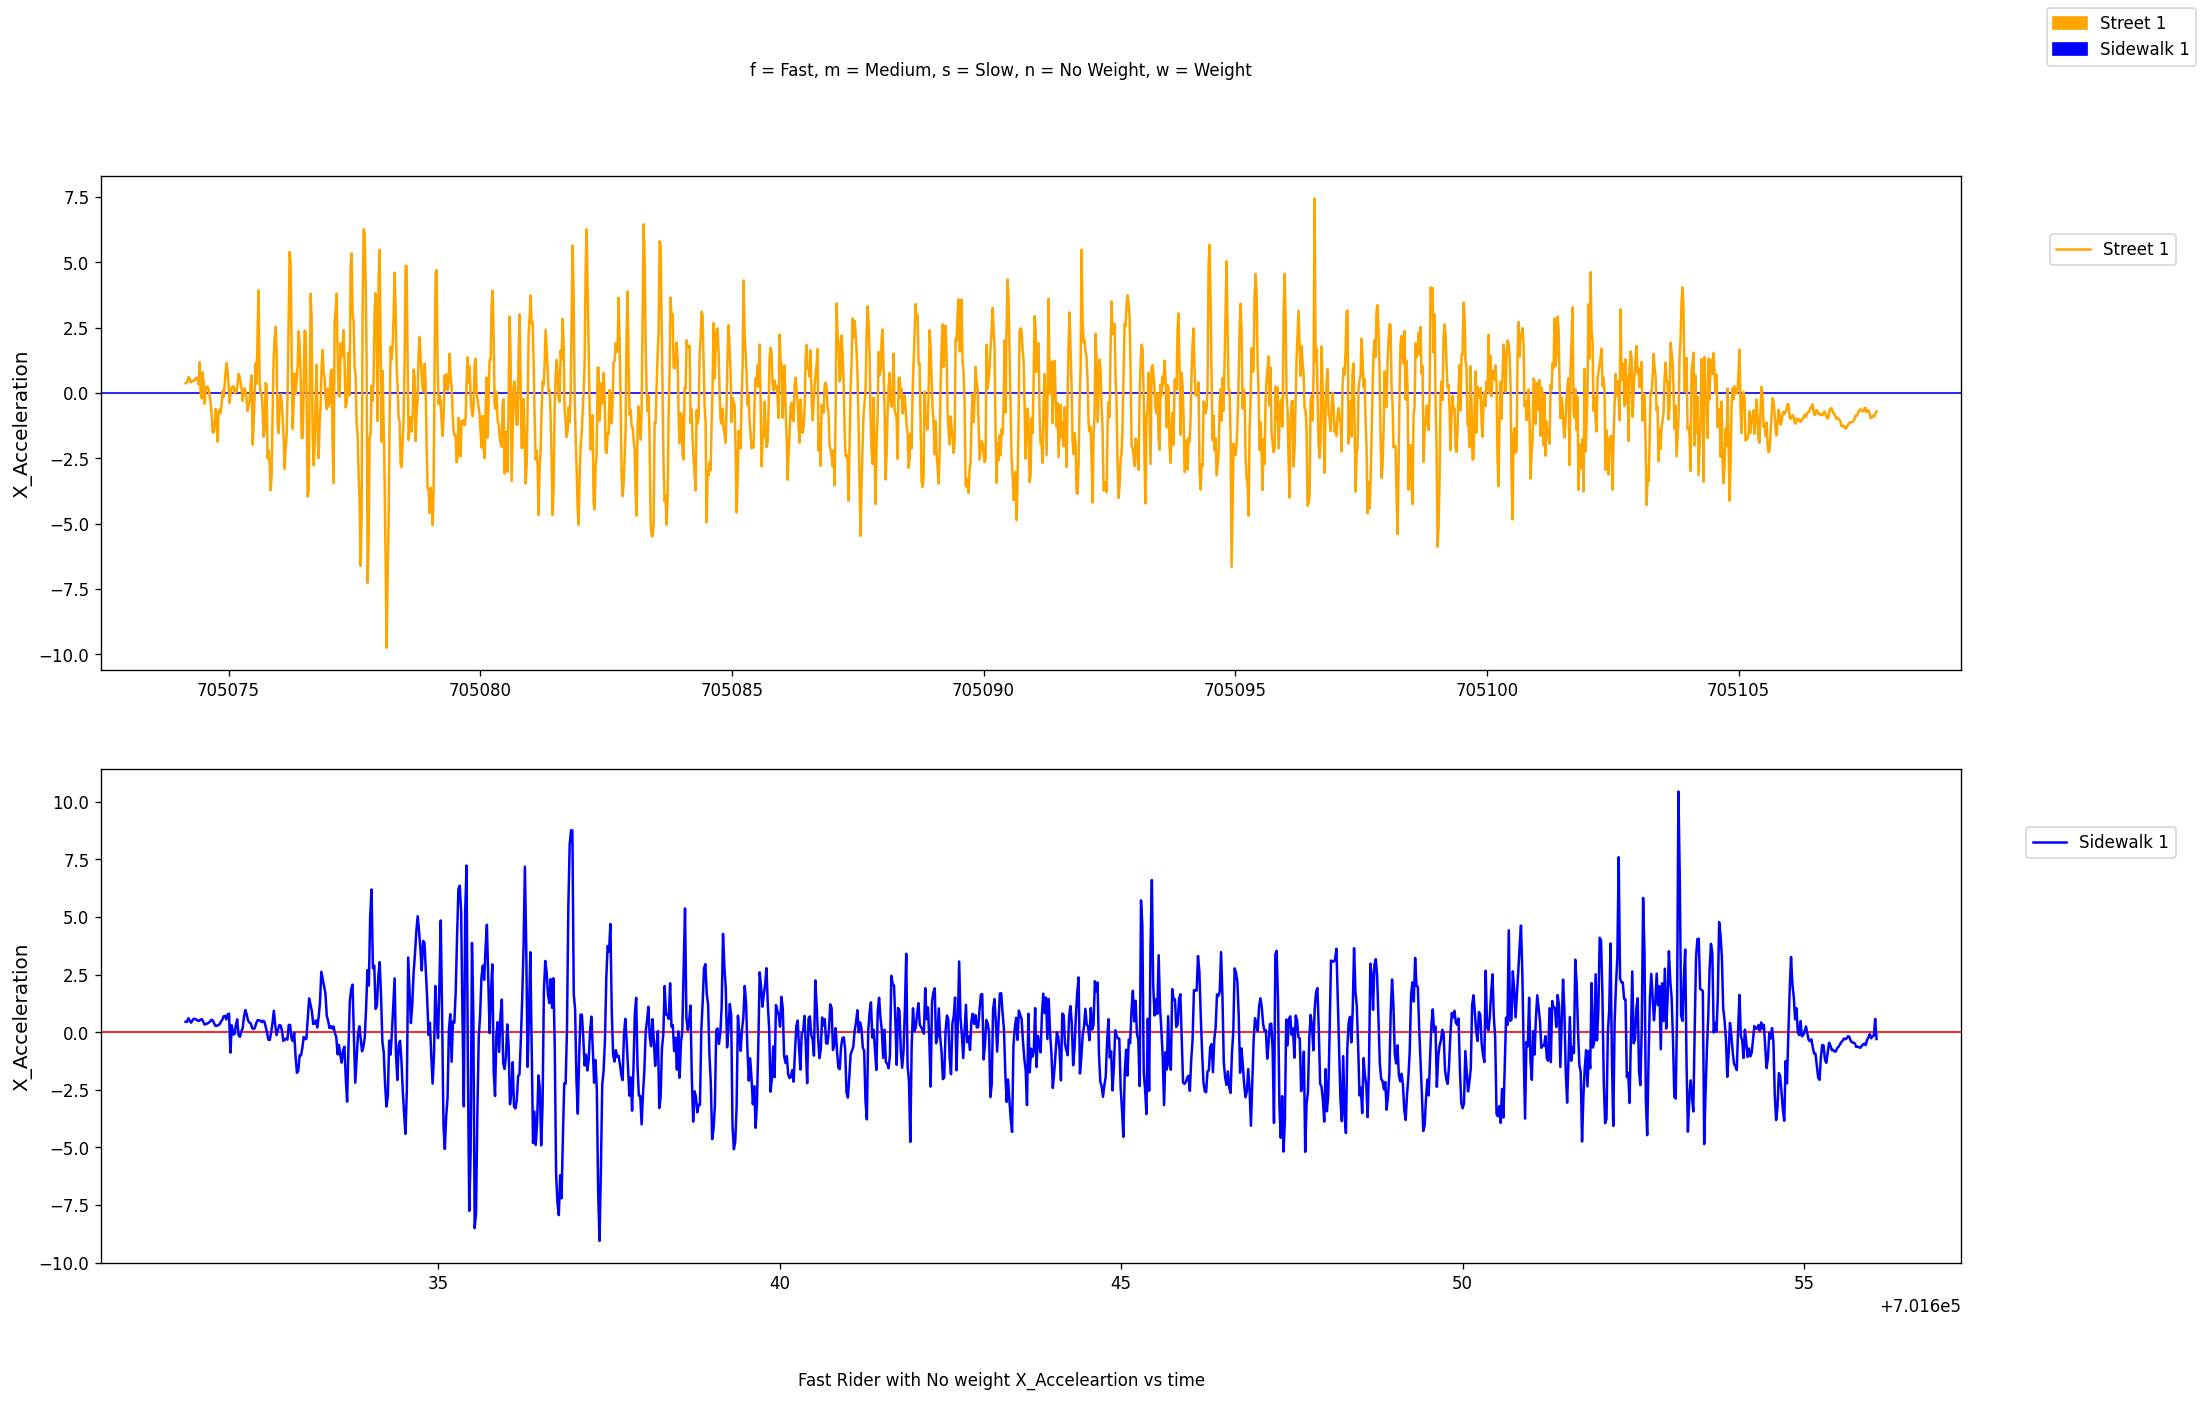

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(2,1,figsize=(20,12),dpi = 120)

#Taking accl_x because need to assess the forward,backward movement

ax1.plot(stfn['time'],stfn['accl_x'], label='Street 1', c ='orange')
ax1.axhline(y=0.0,c="blue",linewidth=1,zorder=0)        
ax1.legend(bbox_to_anchor=(1.12,0.9))
ax1.set_ylabel('X_Acceleration',fontsize=12)

ax2.plot(swfn['time'],swfn['accl_x'], label='Sidewalk 1', c = 'blue')
ax2.axhline(y=0.0,c="red",linewidth=1,zorder=0)        
ax2.legend(bbox_to_anchor=(1.12,0.9))
ax2.set_ylabel('X_Acceleration',fontsize=12)

blue_patch = mpatches.Patch(color='blue', label='Sidewalk 1')
orange_patch = mpatches.Patch(color='orange', label='Street 1')
fig.legend(handles=[orange_patch, blue_patch])

fig.text(0.5, 0.04, 'Fast Rider with No weight X_Acceleartion vs time', ha='center')
fig.text(0.5, 0.95, 'f = Fast, m = Medium, s = Slow, n = No Weight, w = Weight', ha='center')
plt.show()
fig.savefig('visualization1_Zm.png')

**Observation:** After carefully viewing the two graphs, it is fairly understood that the sidewalk in this case has not been obstructed much in comparision to the streets.

Deployed a quick function to check the same;

In [ ]:
#Number of times it crosses Zero for Street 
count = 0 
#print(stfn.loc[0]['accl_x'])
for i in range(len(stfn)):
    if stfn.loc[i]['accl_x'] <= 0.000:
        count = count +1
print(count)

992


In [ ]:
#Number of times it crosses Zero for Sidewalk
count = 0 
#print(stfn.loc[0]['accl_x'])
for i in range(len(swfn)):
    if swfn.loc[i]['accl_x'] <= 0.000:
        count = count +1
print(count)

653


Clearly Sidewalk has less breaks;


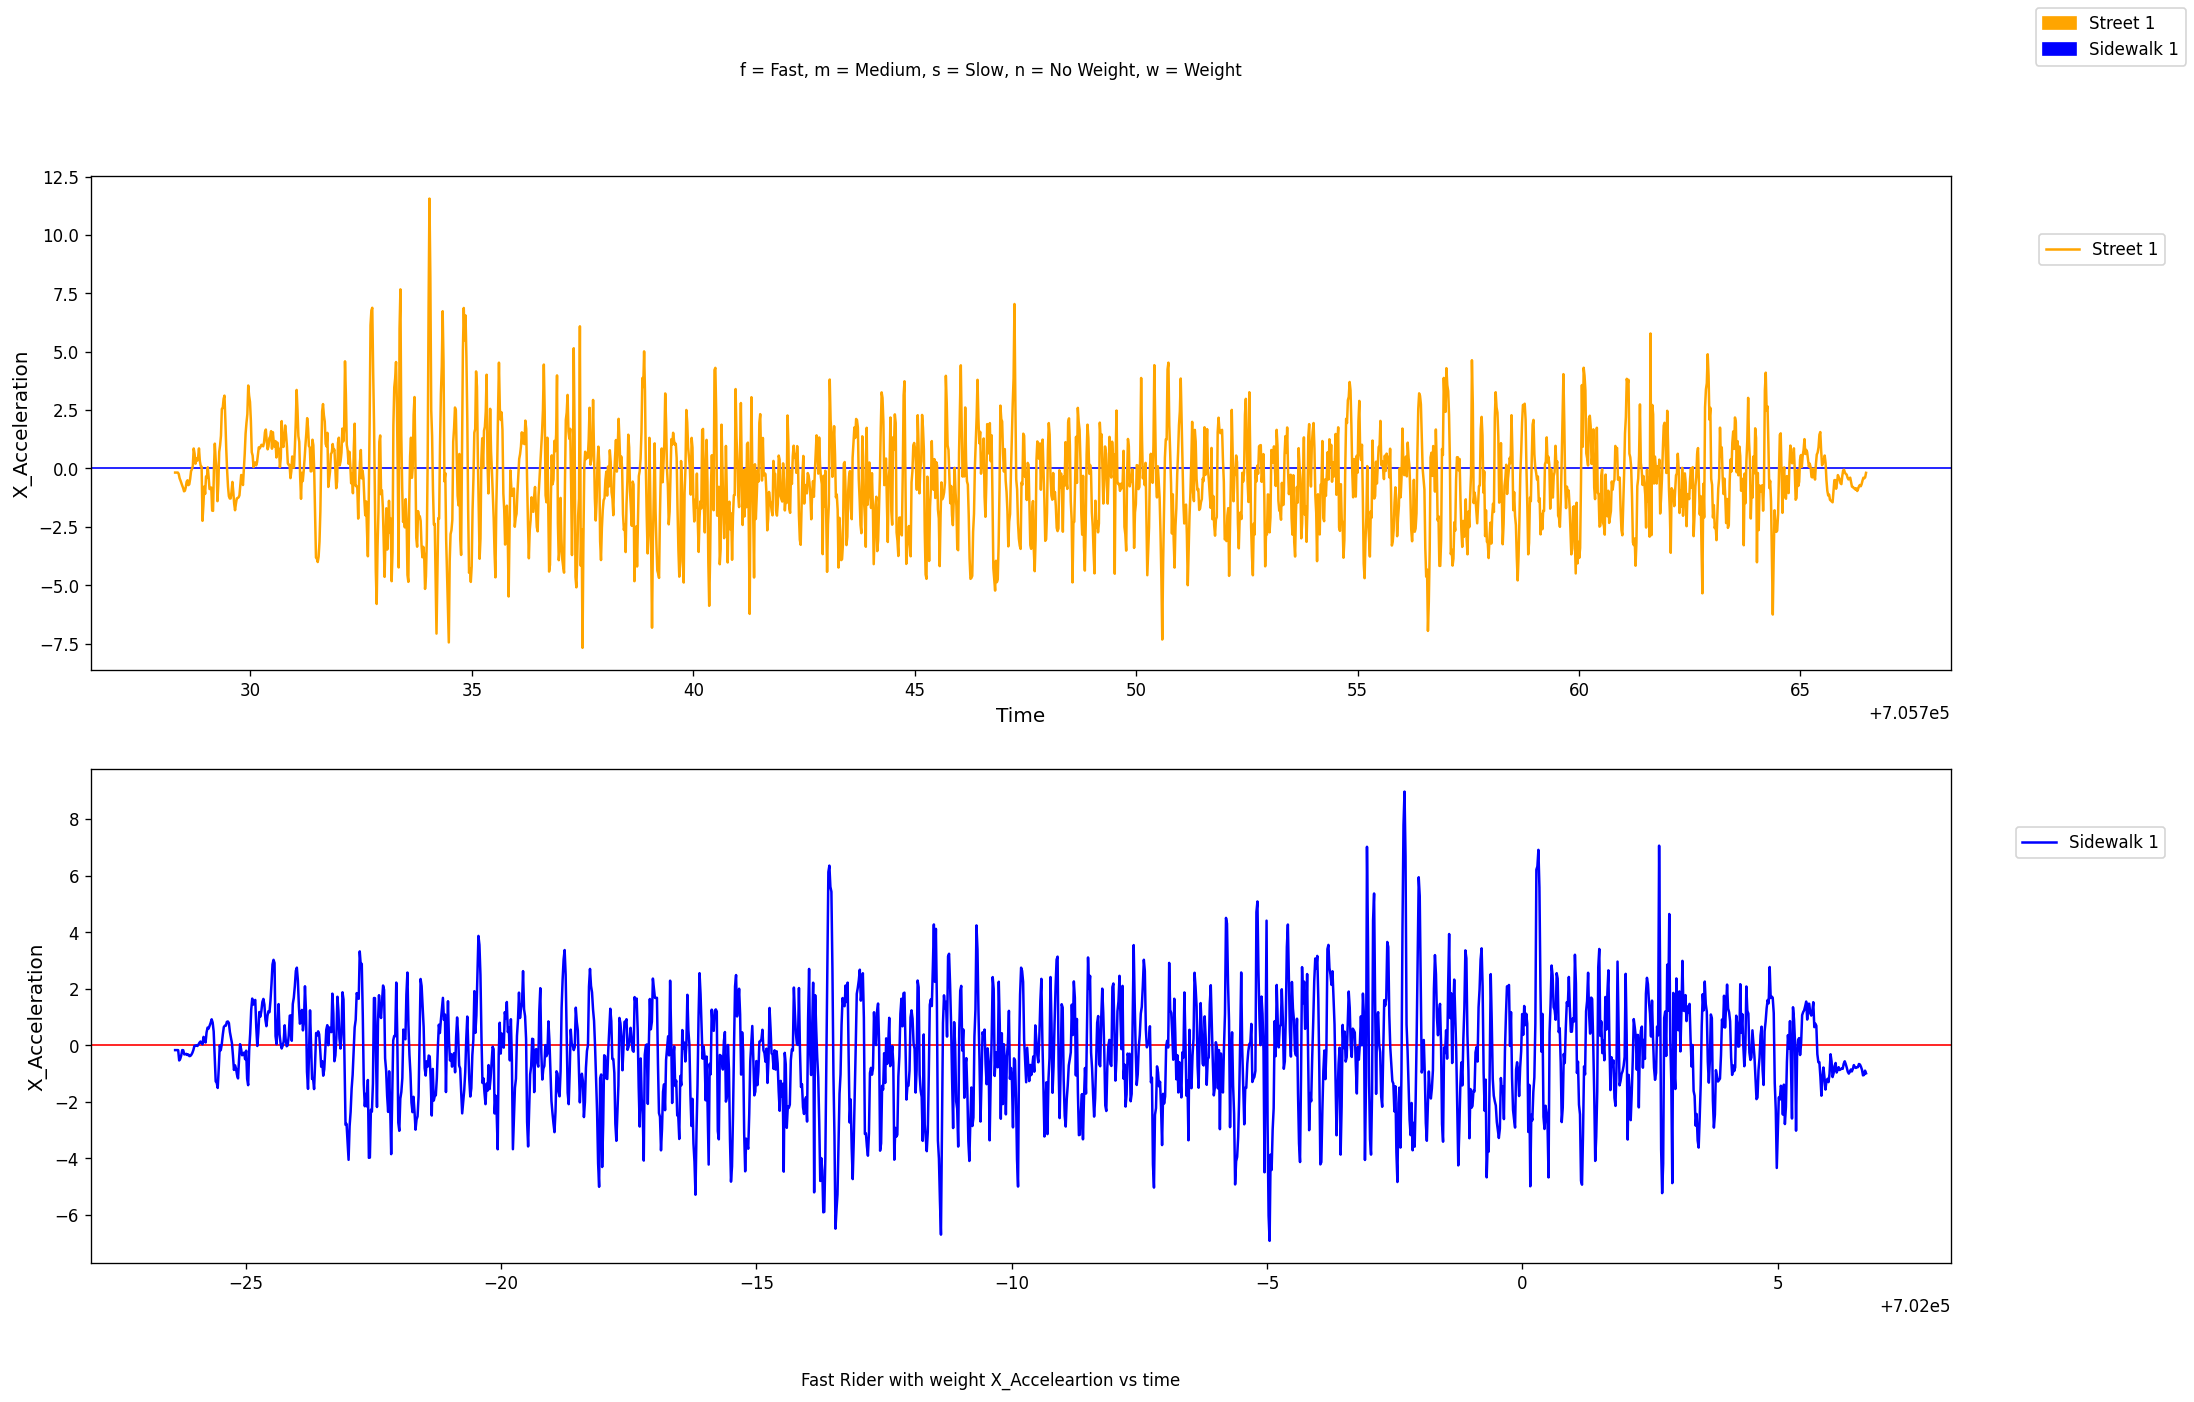

In [ ]:
#Rendering another visualization
fig, ((ax1, ax2)) = plt.subplots(2,1,figsize=(20,12),dpi = 120)

#Taking accl_x because need to assess the forward,backward movement

ax1.plot(stfw['time'],stfw['accl_x'], label='Street 1', c ='orange')
ax1.axhline(y=0.0,c="blue",linewidth=1,zorder=0)        
ax1.legend(bbox_to_anchor=(1.12,0.9))
ax1.set_ylabel('X_Acceleration',fontsize=12)
ax1.set_xlabel('Time',fontsize=12)

ax2.plot(swfw['time'],swfw['accl_x'], label='Sidewalk 1', c = 'blue')
ax2.axhline(y=0.0,c="red",linewidth=1,zorder=0)        
ax2.legend(bbox_to_anchor=(1.12,0.9))
ax2.set_ylabel('X_Acceleration',fontsize=12)

blue_patch = mpatches.Patch(color='blue', label='Sidewalk 1')
orange_patch = mpatches.Patch(color='orange', label='Street 1')
fig.legend(handles=[orange_patch, blue_patch])

fig.text(0.5, 0.04, 'Fast Rider with weight X_Acceleartion vs time', ha='center')
fig.text(0.5, 0.95, 'f = Fast, m = Medium, s = Slow, n = No Weight, w = Weight', ha='center')
plt.show()
fig.savefig('visualization2_ZM.png')

In [ ]:
#Number of times it crosses Zero for Street 
count = 0 
for i in range(len(stfw)):
    if stfw.loc[i]['accl_x'] <= 0.000:
        count = count +1
print(count)

1173


In [ ]:
#Number of times it crosses Zero for Sidewalk  
count = 0 
for i in range(len(swfw)):
    if swfw.loc[i]['accl_x'] <= 0.000:
        count = count +1
print(count)
#Sidewalk has lesser road blocks

943


Again, as a conclusiom it can be seen that street has more brakes and obstruction in comparision to sidewalks;